In [1]:
import numpy as np 
import pandas as pd 
import os

In [2]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error

%matplotlib inline

In [3]:
df = pd.read_csv('dgb_price.csv')
df.head(4)

,Date,Open,High,Low,Close,Volume,Market Cap
0,28-09-2019,0.007737,0.007827,0.007525,0.007706,3780906,94908269
1,27-09-2019,0.007453,0.007752,0.007311,0.007735,4677649,95238419
2,26-09-2019,0.007094,0.007690,0.006994,0.007453,3986473,91741098
3,25-09-2019,0.006518,0.007392,0.006518,0.007091,4307104,87264231


In [4]:
print (df.describe())

              Open         High          Low        Close        Volume  \
count  2061.000000  2061.000000  2061.000000  2061.000000  2.061000e+03   
mean      0.009384     0.010052     0.008721     0.009387  3.814417e+06   
std       0.015215     0.016570     0.013889     0.015211  1.477271e+07   
min       0.000032     0.000040     0.000020     0.000032  1.120000e+02   
25%       0.000196     0.000210     0.000178     0.000196  4.273000e+03   
50%       0.000354     0.000383     0.000338     0.000355  5.296900e+04   
75%       0.013436     0.014341     0.012615     0.013408  2.499030e+06   
max       0.127021     0.142889     0.121018     0.126931  2.321930e+08   

         Market Cap  
count  2.061000e+03  
mean   9.521033e+07  
std    1.514492e+08  
min    8.872500e+04  
25%    4.703600e+05  
50%    2.408829e+06  
75%    1.439423e+08  
max    1.226722e+09  


In [5]:
print (df.dtypes)

Date           object
Open          float64
High          float64
Low           float64
Close         float64
Volume          int64
Market Cap      int64
dtype: object


In [6]:
df1 = df[['Date','Close']]
df1.head(4)

,Date,Close
0,28-09-2019,0.007706
1,27-09-2019,0.007735
2,26-09-2019,0.007453
3,25-09-2019,0.007091


In [7]:
# Setting the Date as Index
df_ts = df1.set_index('Date')
df_ts.sort_index(inplace=True)
print (type(df_ts))
print (df_ts.head(3))
print (df_ts.tail(3))


<class 'pandas.core.frame.DataFrame'>
               Close
Date                
01-01-2015  0.000045
01-01-2016  0.000130
01-01-2017  0.000260
               Close
Date                
31-12-2016  0.000253
31-12-2017  0.070367
31-12-2018  0.010426


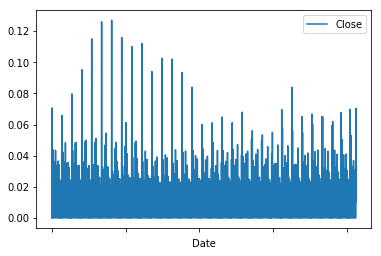

In [8]:
#plot
df_ts.plot()

In [9]:
# Dickey Fuller Test Function
def test_stationarity(timeseries):
    # Perform Dickey-Fuller test:
    from statsmodels.tsa.stattools import adfuller
    print('Results of Dickey-Fuller Test:')
       
    dftest = adfuller(timeseries, autolag='AIC')
    
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#lags Used', 'Number of Observations Used'])
    
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    
    print(dfoutput)

In [10]:
# Stationarity with Dickey Fuller Test 
# Convert the DF to series first
ts = df_ts['Close']
test_stationarity(ts)

Results of Dickey-Fuller Test:
Test Statistic                -1.619859e+01
p-value                        4.099742e-29
#lags Used                     2.400000e+01
Number of Observations Used    2.036000e+03
Critical Value (1%)           -3.433566e+00
Critical Value (5%)           -2.862961e+00
Critical Value (10%)          -2.567526e+00
dtype: float64


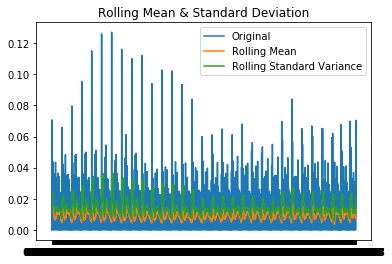

In [11]:
# plot the 12-Month Moving Rolling Mean, Variance 
# Rolling Statistics
rolmean = ts.rolling(window=12).mean()
rolvar = ts.rolling(window=12).std()

plt.plot(ts, label='Original')
plt.plot(rolmean, label='Rolling Mean')
plt.plot(rolvar, label='Rolling Standard Variance')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)